In [1]:
#BUILD PCA - PRINCIPLE COMPONENT ANALYSIS


In [2]:
#why do dimensiaonlly reduction?
#reason 1- space efficiency
#reason2- computing efficiency
#reason3 - visualisation (so we can analyse by human eye)

#we build PCA and then compare it to T-SNE and LDA(3 DR methods total)

In [5]:
import numpy as np #math
np.random.seed(1) # random seed for consistency, debugging same results every time

In [11]:
#step-1 Create our dataset

mu_vec1 = np.array([0,0,0]) #sample mean #covariance that how much is change in one variable with change in other variable
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])#sample covariance

class1_sample = np.random.multivariate_normal(mu_vec1 , cov_mat1, 20).T
print(class1_sample)

#3 x 20 matrix 3 columns with 20 rows

[[-0.75439794 -0.29809284  1.13162939 -1.39649634  0.16003707 -2.02220122
   0.23009474 -0.20075807  0.19829972  0.37756379  1.19891788 -0.63873041
  -0.34385368  0.69803203  0.40349164  0.16938243 -0.26621851  0.31515939
   0.35054598 -1.61577235]
 [ 1.25286816  0.48851815  1.51981682 -1.44411381  0.87616892 -0.30620401
   0.76201118  0.18656139  0.11900865  0.12182127  0.18515642  0.42349435
   0.04359686 -0.44712856  0.59357852  0.74055645  0.03261455  0.84616065
  -1.31228341  1.12141771]
 [ 0.51292982 -0.07557171  2.18557541 -0.50446586  0.31563495  0.82797464
  -0.22232814  0.41005165 -0.67066229  1.12948391 -0.37528495  0.07734007
  -0.62000084  1.2245077  -1.09491185 -0.9537006  -1.37311732 -0.85951594
  -0.03869551  0.40890054]]


In [13]:
# create class 2 random sampled 3 x 20 data set
mu_vec2 = np.array([1,1,1]) #sample mean #covariance that how much is change in one variable with change in other variable
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])#sample covariance

class2_sample = np.random.multivariate_normal(mu_vec1 , cov_mat1, 20).T
print(class2_sample)

#3 x 20 matrix 3 columns with 20 rows

[[-1.27255876  1.29322588  0.5627611  -0.0731127   1.90465871 -1.62743834
   0.81095167  0.82400562 -1.33195167 -0.89055558 -0.3264995  -0.58652394
   0.62336218  0.12910158  1.55880554  2.44936865 -0.7003985   0.20183018
  -0.12046457 -0.66575452]
 [ 0.31354772 -0.11044703  0.24073709  1.16033857  1.1110567   0.60231928
   1.04444209 -0.56230543 -1.76068856 -1.1191154  -1.34267579 -1.23685338
  -0.43495668  1.6169496   0.1094027  -0.54577417 -0.20339445  0.66102029
  -1.23312074 -1.67419581]
 [ 0.50318481 -0.61736206  0.28066508  0.36949272  0.6590498   0.4202822
  -0.40087819  1.95487808 -1.65072127  1.9560789   1.11438298  0.87583893
   1.40754     0.50274088 -1.2197444  -0.19883786  0.24266944  1.79215821
  -1.18231813  0.82502982]]


Populating the interactive namespace from numpy and matplotlib


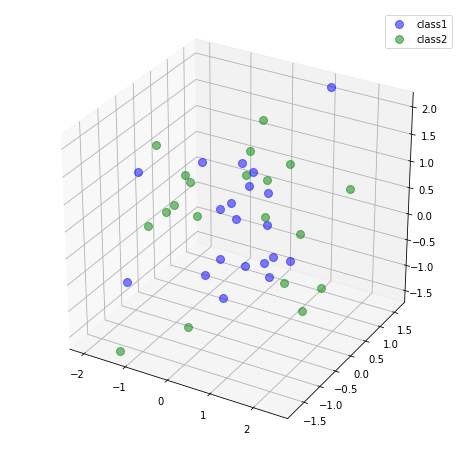

In [22]:
%pylab inline

#step2- plot the data
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

#figure ,width and height
fig = plt.figure(figsize=(8,8))

#3d subplot
#These are subplot grid parameters encoded as a single integer, so 1x1 grid 1st subplot
ax = fig.add_subplot(111, projection='3d')
#fontsize
plt.rcParams['legend.fontsize']=10

#plot samples
ax.plot(class1_sample[0,:],class1_sample[1,:],class1_sample[2,:],
       'o',markersize=8 , alpha=0.5,color='blue', label='class1')
ax.plot(class2_sample[0,:],class2_sample[1,:],class2_sample[2,:],
       'o',markersize=8 , alpha=0.5,color='green', label='class2')
ax.legend(loc='upper right')

plt.show()


In [23]:
#step3 =merge the f=data into one Bigasss dataset

In [28]:
all_samples = np.concatenate((class1_sample, class2_sample),axis=1)

In [29]:
all_samples

array([[-0.75439794, -0.29809284,  1.13162939, -1.39649634,  0.16003707,
        -2.02220122,  0.23009474, -0.20075807,  0.19829972,  0.37756379,
         1.19891788, -0.63873041, -0.34385368,  0.69803203,  0.40349164,
         0.16938243, -0.26621851,  0.31515939,  0.35054598, -1.61577235,
        -1.27255876,  1.29322588,  0.5627611 , -0.0731127 ,  1.90465871,
        -1.62743834,  0.81095167,  0.82400562, -1.33195167, -0.89055558,
        -0.3264995 , -0.58652394,  0.62336218,  0.12910158,  1.55880554,
         2.44936865, -0.7003985 ,  0.20183018, -0.12046457, -0.66575452],
       [ 1.25286816,  0.48851815,  1.51981682, -1.44411381,  0.87616892,
        -0.30620401,  0.76201118,  0.18656139,  0.11900865,  0.12182127,
         0.18515642,  0.42349435,  0.04359686, -0.44712856,  0.59357852,
         0.74055645,  0.03261455,  0.84616065, -1.31228341,  1.12141771,
         0.31354772, -0.11044703,  0.24073709,  1.16033857,  1.1110567 ,
         0.60231928,  1.04444209, -0.56230543, -1.

In [30]:
all_samples.T

array([[-0.75439794,  1.25286816,  0.51292982],
       [-0.29809284,  0.48851815, -0.07557171],
       [ 1.13162939,  1.51981682,  2.18557541],
       [-1.39649634, -1.44411381, -0.50446586],
       [ 0.16003707,  0.87616892,  0.31563495],
       [-2.02220122, -0.30620401,  0.82797464],
       [ 0.23009474,  0.76201118, -0.22232814],
       [-0.20075807,  0.18656139,  0.41005165],
       [ 0.19829972,  0.11900865, -0.67066229],
       [ 0.37756379,  0.12182127,  1.12948391],
       [ 1.19891788,  0.18515642, -0.37528495],
       [-0.63873041,  0.42349435,  0.07734007],
       [-0.34385368,  0.04359686, -0.62000084],
       [ 0.69803203, -0.44712856,  1.2245077 ],
       [ 0.40349164,  0.59357852, -1.09491185],
       [ 0.16938243,  0.74055645, -0.9537006 ],
       [-0.26621851,  0.03261455, -1.37311732],
       [ 0.31515939,  0.84616065, -0.85951594],
       [ 0.35054598, -1.31228341, -0.03869551],
       [-1.61577235,  1.12141771,  0.40890054],
       [-1.27255876,  0.31354772,  0.503

In [51]:
# step4 - compute the dimensional mean vector, it will help compute the covariance matrix
#mean for  each feature
mean_x= np.mean(all_samples[0,:])
mean_y= np.mean(all_samples[1,:])
mean_z= np.mean(all_samples[2,:])

#3d mean vector
mean_vector = np.array(([mean_x],[mean_y],[mean_z]))
print ('Mean Vector:\n',mean_vector)

Mean Vector:
 [[ 0.01148614]
 [ 0.06099767]
 [ 0.19845684]]


In [79]:
 #Step5 = compute covariance matrix
cov_mat = np.zeros((3,3))

for i in range((all_samples.shape[1])):
    cov_mat += (all_samples[:,i].reshape(3,1) -mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Covariance Matrix:\n', cov_mat)
    

Covariance Matrix:
 [[ 37.88783359   7.40439336  -0.88879775]
 [  7.40439336  32.69318972   1.64460121]
 [ -0.88879775   1.64460121  36.49825612]]


In [81]:
#step 6 - compute eignvectors and eigenvalues

eig_val, eig_vec = np.linalg.eig(cov_mat)

print('values')
print(eig_val)
print('vectors')
print(eig_vec)


values
[ 27.07810922  43.1451918   36.85597841]
vectors
[[-0.56522155  0.81286981 -0.14059615]
 [ 0.80196311  0.58138358  0.13728916]
 [-0.19333851  0.03515414  0.98050212]]


In [91]:
#step-7 -create eignpair from both and sort them

#Make a lis of(eignvalue, eignvector) tuples
eig_pairs = [(np.abs(eig_val[i]),eig_vec[:,i])
             for i in range(len(eig_val))]
print('EIGN PAIR:')
print(eig_pairs)
#Sort the (eignvalue, eignvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()
print('\nSORT AND REVERSE THem')
#Visually confirm that the list is correctly sorted by decreasing eignvalues
for i in eig_pairs:
    print(i[0])


EIGN PAIR:
[(27.078109215534067, array([-0.56522155,  0.80196311, -0.19333851])), (43.145191804557761, array([ 0.81286981,  0.58138358,  0.03515414])), (36.855978408383244, array([-0.14059615,  0.13728916,  0.98050212]))]

SORT AND REVERSE THem
43.1451918046
36.8559784084
27.0781092155


In [100]:
#Step-8 - choose-k eignvectors
#stack arrays in sequence horizontally - hstack
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)))
print ('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.81286981 -0.14059615]
 [ 0.58138358  0.13728916]
 [ 0.03515414  0.98050212]]


In [105]:
#step-9 transform our data using this eignpair
transformed = matrix_w.T.dot(all_samples)
print('NEW DATA SAMPLE\n we just performed principle component analysis we now have 2-D data instead of 3-D data\n')
print(transformed)


NEW DATA SAMPLE
 we just performed principle component analysis we now have 2-D data instead of 3-D data

[[ 0.13320126  0.0390491   1.88029591 -1.99248782  0.6505754  -1.79270157
   0.62224209 -0.04031143  0.20680497  0.41744112  1.06901823 -0.27027318
  -0.27595737  0.35050247  0.6345923   0.5347067  -0.24571018  0.71791192
  -0.47935209 -0.64706418 -0.83444407  0.96530936  0.60727863  0.62815987
   2.217358   -0.9579423   1.25232708  0.4116162  -2.16436838 -1.3057768
  -1.00683607 -1.16506448  0.30331647  1.06268414  1.28783183  1.66672371
  -0.67905216  0.61136977 -0.85640153 -1.48551848]
 [ 0.78099944  0.03488073  2.19251296 -0.49654901  0.40726863  1.05410611
  -0.14572777  0.45589518 -0.66912737  1.07110209 -0.51111096  0.22377632
  -0.55358226  1.04110588 -1.04880086 -0.85724961 -1.30443752 -0.77089872
  -0.26738873  0.78205771  0.71533734 -0.80231057  0.22912125  0.53186966
   0.53094808  0.72359107 -0.36368802  1.72371164 -1.67299188  1.88950579
   0.95422461  0.77141837  1.2

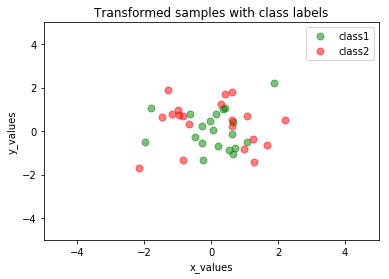

In [108]:
plt.plot(transformed[0,0:20],transformed[1,0:20],
         'o', markersize=7,color='green',alpha=0.5,label='class1')
plt.plot(transformed[0,20:40],transformed[1,20:40],
         'o', markersize=7,color='red',alpha=0.5,label='class2')

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()


In [ ]:
#Compare PCA vs T-SNE vs LDA
#3 most popular DR techniques

Best generic DR method(generally for unsupervised)
PCA 

BEST supervised data (SAME as PCA except we compute mean vectors for each of the classes )
LDA (linear discriminant analysis)

Best visualization
T-SNE

step 1- Compute similarity matrix between all feature vectors
step-2 - Compute similarity matrix from map points
step-3 - Use gradient descent to minimize between matrices


